In [2]:
!pip install -U FlagEmbedding

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached fsspec-2024.3.1-py3-none-any.whl.metadata (6.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.7 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.3 MB/s eta 0:00:00ta 0:00:01
Using cached fsspec-2024.3.1-py3-none-any.whl (171 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 27.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 4.1 MB/s eta 0:00:00:00:01
  Created wheel for FlagEmbedding: filename=FlagEmbedding-1.2.9-py3-none-any.whl size=16

In [180]:
from FlagEmbedding import BGEM3FlagModel

model = BGEM3FlagModel('BAAI/bge-m3',  
                       use_fp16=True) # Setting use_fp16 to True speeds up computation with a slight performance degradation

sentences_1 = ["What is BGE M3?", "Defination of BM25"]
sentences_2 = ["BGE M3 is an embedding model supporting dense retrieval, lexical matching and multi-vector interaction.", 
               "BM25 is a bag-of-words retrieval function that ranks a set of documents based on the query terms appearing in each document"]

embeddings_1 = model.encode(sentences_1, 
                            batch_size=12, 
                            max_length=8192, # If you don't need such a long length, you can set a smaller value to speed up the encoding process.
                            )['dense_vecs']
embeddings_2 = model.encode(sentences_2)['dense_vecs']
similarity = embeddings_1 @ embeddings_2.T
print(similarity)
# [[0.6265, 0.3477], [0.3499, 0.678 ]]


Fetching 30 files: 100%|██████████| 30/30 [00:00<00:00, 117707.32it/s]


[[0.626  0.3477]
 [0.3499 0.678 ]]


In [62]:
import random

# Elementos das frases originais
subjects = ['i', 'we', 'you', 'they', 'he', 'she']
verbs = ['want to', 'can', 'will', 'shall', 'must', 'might']
actions = ['eat', 'drink', 'read', 'see', 'find', 'take', 'make', 'write']
objects = ['bread', 'apple', 'water', 'beer', 'book', 'newspaper', 'car', 'movie', 'house', 'song']

# Gerar combinações únicas de frases
unique_sentences = set()
while len(unique_sentences) < 1000:
    subject = random.choice(subjects)
    verb = random.choice(verbs)
    action = random.choice(actions)
    obj = random.choice(objects)
    sentence = f"{subject} {verb} {action} {obj}"
    unique_sentences.add(sentence)

# Converter o conjunto para uma lista e embaralhar
sentences = list(unique_sentences)
random.shuffle(sentences)

# Salvar em um arquivo TXT
with open('unique_sentences.txt', 'w') as file:
    for sentence in sentences:
        file.write(sentence + "'\n,'")

print(f'{len(sentences)} unique sentences have been generated and saved to unique_sentences.txt.')


1000 unique sentences have been generated and saved to unique_sentences.txt.


In [63]:
sentences2 = ['she might take bread' ,'i shall find book' ,'i can find movie' ,'i might take newspaper' ,'she might see song' ,'we shall write movie' ,'you might read house' ,'i want to find water' ,'you want to eat house' ,'he must see book' ,'she must write newspaper' ,'we might read newspaper' ,'we might eat car' ,'they must eat movie' ,'i will drink bread' ,'he want to read car' ,'she can write book' ,'they will take apple' ,'you must eat water' ,'i might drink bread' ,'she can see movie' ,'you shall make water' ,'we must drink house' ,'he shall write newspaper' ,'she can write beer' ,'we can see book' ,'you might drink beer' ,'they want to take newspaper' ,'they want to see apple' ,'she might take car' ,'he will take song' ,'he will find movie' ,'i can find apple' ,'she must eat newspaper' ,'she will see bread' ,'they will eat beer' ,'i might drink car' ,'i can take water' ,'we will write newspaper' ,'we might make water' ,'you shall read song' ,'she want to eat apple' ,'you can make book' ,'you want to find book' ,'they will write apple' ,'she want to make newspaper' ,'i must take beer' ,'i will find car' ,'they might drink bread' ,'you want to write bread' ,'we might eat newspaper' ,'they might make bread' ,'you want to drink bread' ,'i might eat beer' ,'she might eat book' ,'they might write water' ,'he can read beer' ,'i shall find bread' ,'i want to find house' ,'we want to eat beer' ,'he shall write house' ,'i will read beer' ,'we want to read song' ,'he want to eat house' ,'i want to write book' ,'they want to write bread' ,'i can make bread' ,'we can find house' ,'i might find book' ,'you might find apple' ,'you might make house' ,'we will eat book' ,'he shall see book' ,'we might eat beer' ,'we will read house' ,'i will take beer' ,'you shall make song' ,'we can take song' ,'they must make bread' ,'she might see car' ,'i want to see house' ,'she shall read house' ,'we will read bread' ,'he might eat apple' ,'she might make newspaper' ,'she might see apple' ,'he can see song' ,'we will make newspaper' ,'we might write water' ,'she will read newspaper' ,'she might eat car' ,'you shall write house' ,'i will eat beer' ,'they must drink water' ,'i shall take song' ,'he shall eat book' ,'we might make book' ,'we can see movie' ,'they want to read newspaper' ,'she want to find apple' ,'you want to see book' ,'you want to make beer' ,'he might take beer' ,'he shall write bread' ,'you can write newspaper' ,'he want to read bread' ,'you must see apple' ,'they can read bread' ,'they must take beer' ,'you will take book' ,'i can find book' ,'i want to take book' ,'i might write bread' ,'i will see beer' ,'they will take song' ,'she shall find bread' ,'i want to find bread' ,'we must eat book' ,'i want to see bread' ,'he will read bread' ,'he might find apple' ,'he will take bread' ,'you must read movie' ,'she must write book' ,'he must write book' ,'he can take water' ,'you will find movie' ,'i shall write book' ,'you want to drink beer' ,'he must drink song' ,'he will make car' ,'she might drink movie' ,'you must eat book' ,'you will drink beer' ,'she shall write song' ,'she must see song' ,'i want to write movie' ,'she might write book' ,'they can make car' ,'we might see water' ,'she might see newspaper' ,'we want to take song' ,'he shall read bread' ,'they might make movie' ,'he shall read book' ,'we can see beer' ,'they will see car' ,'you can see newspaper' ,'he shall find book' ,'they can make book' ,'i must eat movie' ,'they will see apple' ,'i want to drink apple' ,'i must make apple' ,'i must write book' ,'he can write beer' ,'i will drink newspaper' ,'they shall see movie' ,'he must drink book' ,'they can drink water' ,'we might find movie' ,'she want to take beer' ,'we shall eat car' ,'we must eat apple' ,'you can eat apple' ,'you must see beer' ,'i shall find house' ,'they shall see book' ,'i might make bread' ,'he shall find movie' ,'he want to make car' ,'they might make house' ,'they want to drink book' ,'you shall find beer' ,'he might make beer' ,'she might take newspaper' ,'you will see bread' ,'she might see book' ,'they shall write apple' ,'she can read water' ,'they want to find bread' ,'i want to eat newspaper' ,'she might find newspaper' ,'they might make book' ,'we want to read beer' ,'he want to take newspaper' ,'i shall read car' ,'he might see apple' ,'she might take movie' ,'you will find house' ,'she must drink newspaper' ,'he will write apple' ,'she can eat water' ,'you shall drink car' ,'i shall eat car' ,'he will eat beer' ,'he might write bread' ,'you can read newspaper' ,'i want to find book' ,'i might make newspaper' ,'you want to read bread' ,'we might write house' ,'he can eat newspaper' ,'they shall eat house' ,'we might eat apple' ,'we might eat movie' ,'we want to make book' ,'we want to take water' ,'you want to eat newspaper' ,'i might read apple' ,'we might write car' ,'she will take book' ,'he can eat movie' ,'i might read bread' ,'they might eat book' ,'they will drink newspaper' ,'you can see song' ,'you want to see apple' ,'you shall find car' ,'you might see beer' ,'i can find water' ,'you can write car' ,'i must write apple' ,'he want to take house' ,'you might take book' ,'they might find movie' ,'you shall eat song' ,'i can drink newspaper' ,'he shall read apple' ,'they can find beer' ,'we might take water' ,'we might drink car' ,'i must find house' ,'they can write book' ,'you want to find beer' ,'he might write movie' ,'you will eat apple' ,'he will find apple' ,'she will write car' ,'i will read newspaper' ,'she might find bread' ,'i shall see song' ,'you can make movie' ,'he shall find water' ,'we might see car' ,'you must read car' ,'you shall take bread' ,'he might eat book' ,'he shall drink apple' ,'you will eat car' ,'we will drink car' ,'we must eat water' ,'we want to read water' ,'he might eat water' ,'she will make car' ,'she shall read beer' ,'she will find movie' ,'we want to see water' ,'they shall see bread' ,'she might read newspaper' ,'we will write song' ,'she shall make apple' ,'i shall see water' ,'i will see movie' ,'we shall eat movie' ,'she want to make song' ,'she will see house' ,'we want to take book' ,'she must take water' ,'she will write newspaper' ,'we must write newspaper' ,'we want to see car' ,'i can drink beer' ,'we will find movie' ,'they must see apple' ,'you can drink song' ,'i might read movie' ,'he must read movie' ,'you can take movie' ,'we might take beer' ,'they might read car' ,'i want to eat book' ,'he want to read beer' ,'you might see bread' ,'you want to drink movie' ,'i want to write bread' ,'we must write bread' ,'they must take movie' ,'she might make house' ,'i might drink song' ,'they shall drink song' ,'she might find movie' ,'i will write book' ,'she must make apple' ,'she might write bread' ,'we can find bread' ,'she shall make beer' ,'she want to eat newspaper' ,'i might eat bread' ,'we must make book' ,'they will take car' ,'we can take bread' ,'i can write newspaper' ,'you must drink beer' ,'they must read beer' ,'they want to see water' ,'he might make water' ,'we might eat song' ,'they want to drink song' ,'you might read song' ,'she will drink house' ,'they shall read book' ,'i want to drink house' ,'you can drink bread' ,'you will drink movie' ,'you might take newspaper' ,'we want to eat song' ,'we might make bread' ,'you might write newspaper' ,'he must eat car' ,'we can drink song' ,'you shall drink house' ,'he can drink apple' ,'he must take movie' ,'they shall see apple' ,'they shall drink beer' ,'you shall see song' ,'he want to find water' ,'you might take water' ,'we shall drink water' ,'you want to write song' ,'you can take bread' ,'i shall write bread' ,'you must drink water' ,'they might take bread' ,'i will find bread' ,'i will take house' ,'i will take movie' ,'we must see car' ,'i shall find newspaper' ,'i might see bread' ,'they want to see beer' ,'he might drink book' ,'she will see water' ,'we shall eat book' ,'you will read car' ,'they shall find water' ,'he will take house' ,'we will write car' ,'she will read water' ,'she shall drink beer' ,'she shall find water' ,'she want to find book' ,'they shall write beer' ,'she will drink movie' ,'we shall drink song' ,'he might find song' ,'i will make bread' ,'she might take water' ,'i will drink movie' ,'we might take book' ,'we will make song' ,'you will drink house' ,'you shall take beer' ,'they can see house' ,'i might write water' ,'i must drink apple' ,'i will find newspaper' ,'he will write song' ,'she must drink beer' ,'he shall write water' ,'i will eat movie' ,'we shall drink movie' ,'he must find movie' ,'i can read water' ,'she shall take water' ,'you will eat bread' ,'i shall drink water' ,'she will write apple' ,'i can see beer' ,'you might make apple' ,'he shall find song' ,'you want to make apple' ,'he will drink beer' ,'you might see book' ,'he must read book' ,'you will see beer' ,'they will drink water' ,'you want to take book' ,'she must take book' ,'i can take beer' ,'they can take car' ,'you might find bread' ,'you shall make book' ,'he will write movie' ,'i will read book' ,'they shall eat book' ,'i want to find apple' ,'you can read song' ,'you will drink car' ,'they shall see beer' ,'you can find bread' ,'she can find bread' ,'she must find apple' ,'he can drink beer' ,'you will see newspaper' ,'she shall drink newspaper' ,'he shall take house' ,'we might find house' ,'they want to write movie' ,'you can write song' ,'we will take movie' ,'you must write newspaper' ,'they want to drink apple' ,'she will eat water' ,'i want to drink movie' ,'he must see house' ,'he want to find beer' ,'we want to read car' ,'we shall take apple' ,'you must see movie' ,'i will eat water' ,'he want to eat song' ,'you shall read book' ,'i must drink bread' ,'he will read movie' ,'we will make apple' ,'we must take car' ,'he will read book' ,'i must find book' ,'they can write car' ,'they want to read car' ,'she must see beer' ,'she must make song' ,'he might drink house' ,'i must see beer' ,'he shall eat bread' ,'she can find car' ,'i want to write beer' ,'they will eat house' ,'we shall drink newspaper' ,'you want to find car' ,'you might take movie' ,'they must write house' ,'i can take house' ,'you will drink bread' ,'we must make bread' ,'she want to see book' ,'he might see car' ,'you might drink water' ,'you must make movie' ,'i want to see song' ,'we can take apple' ,'we shall make car' ,'they can see movie' ,'she must write car' ,'he must make beer' ,'we will find newspaper' ,'they must take house' ,'we will take song' ,'you must eat house' ,'she want to read song' ,'i must find newspaper' ,'they want to find car' ,'she will read movie' ,'we can read song' ,'she will drink bread' ,'they must read book' ,'she must make beer' ,'we might drink book' ,'they can write water' ,'he shall eat movie' ,'you want to write book' ,'they want to find book' ,'i want to see apple' ,'they must see book' ,'i want to find beer' ,'i can make house' ,'she must see apple' ,'she shall see newspaper' ,'i will eat house' ,'i want to take house' ,'we will take apple' ,'i can drink song' ,'they can eat bread' ,'you can find house' ,'i might take book' ,'he will drink house' ,'he might drink movie' ,'she will find book' ,'he might make movie' ,'you want to drink house' ,'i can write bread' ,'you can drink water' ,'they can eat newspaper' ,'we will write apple' ,'i can find bread' ,'we shall eat water' ,'they can make house' ,'i will read water' ,'you might find book' ,'he want to see house' ,'you will write house' ,'you want to eat movie' ,'we must make beer' ,'she will see beer' ,'she must make newspaper' ,'we want to write movie' ,'you must find beer' ,'he will take water' ,'he must write car' ,'we must eat car' ,'we can take car' ,'they will find bread' ,'he might drink song' ,'he must read car' ,'you shall find book' ,'she shall see apple' ,'you can drink newspaper' ,'they might read water' ,'they can make apple' ,'we want to make house' ,'he must read newspaper' ,'you shall write apple' ,'you can take water' ,'they will see beer' ,'she want to make car' ,'you shall read apple' ,'she shall write apple' ,'you might find beer' ,'i can eat book' ,'we shall see apple' ,'you can drink beer' ,'he shall find beer' ,'i shall find apple' ,'you want to write house' ,'we must make water' ,'she want to find song' ,'we shall write beer' ,'we might read movie' ,'they can read car' ,'she shall read movie' ,'she can eat book' ,'i can find newspaper' ,'he will find book' ,'you want to write water' ,'he want to drink car' ,'they must write book' ,'they want to take beer' ,'she can drink book' ,'they want to take apple' ,'she must read movie' ,'you might find newspaper' ,'he must eat movie' ,'i might see car' ,'they might read song' ,'we might make house' ,'i shall see apple' ,'i might write beer' ,'you want to eat car' ,'you will drink apple' ,'you will find newspaper' ,'i shall read movie' ,'you might eat song' ,'they must find song' ,'i must drink movie' ,'they must read apple' ,'you might take apple' ,'we might write bread' ,'we can read apple' ,'i want to make newspaper' ,'you might see house' ,'we shall write apple' ,'they want to make house' ,'he must write water' ,'i can find beer' ,'we might eat water' ,'you can read movie' ,'he will eat song' ,'she shall see bread' ,'they shall drink bread' ,'he must read song' ,'we might make car' ,'we want to write bread' ,'i must see bread' ,'you must drink song' ,'i can see newspaper' ,'he might find movie' ,'we must read car' ,'i might write car' ,'we want to take apple' ,'he shall take newspaper' ,'he can take beer' ,'he will write water' ,'he can drink water' ,'i might write song' ,'we want to read apple' ,'they can make water' ,'she might find water' ,'you will find song' ,'she can read bread' ,'she will drink book' ,'he must take car' ,'he want to write water' ,'you want to see car' ,'she shall drink book' ,'i must see water' ,'he might find newspaper' ,'i want to make car' ,'they will see book' ,'i want to make water' ,'she want to see newspaper' ,'we will make bread' ,'he might write song' ,'she want to read movie' ,'you must take song' ,'we must make movie' ,'she shall eat water' ,'they might take book' ,'you shall eat beer' ,'he will eat car' ,'i might drink apple' ,'he will write newspaper' ,'we will eat newspaper' ,'you can write house' ,'he want to find song' ,'i shall drink song' ,'they want to see book' ,'we shall find book' ,'they want to write car' ,'you might drink song' ,'they must take water' ,'they shall read house' ,'i can see house' ,'you will write bread' ,'we can read movie' ,'you might drink book' ,'you want to take house' ,'they will drink apple' ,'i might eat house' ,'they shall make book' ,'you must drink bread' ,'they might find beer' ,'i want to take song' ,'i might eat newspaper' ,'you can eat book' ,'they might write car' ,'he can eat song' ,'he shall write movie' ,'she will read bread' ,'you might eat book' ,'you shall find bread' ,'she can see house' ,'they shall find song' ,'they will read beer' ,'she will eat apple' ,'she might take beer' ,'i want to eat beer' ,'she will eat movie' ,'he shall make house' ,'they must see song' ,'she will eat beer' ,'we can eat song' ,'he must see movie' ,'he must find bread' ,'he want to drink water' ,'you must drink movie' ,'he must drink house' ,'we want to take movie' ,'you shall see movie' ,'i might write newspaper' ,'we might eat bread' ,'you might drink movie' ,'she shall take apple' ,'they might drink newspaper' ,'you shall write water' ,'i might see beer' ,'i want to read newspaper' ,'she might see water' ,'we can make bread' ,'he shall eat apple' ,'he must find water' ,'you will take house' ,'we shall find beer' ,'we want to drink song' ,'she can read car' ,'she might write beer' ,'she will read apple' ,'he must write movie' ,'i shall eat bread' ,'we must make house' ,'you might take car' ,'he shall take water' ,'you must read apple' ,'she must write house' ,'he will make beer' ,'she will drink water' ,'she want to write car' ,'he might write water' ,'she will write bread' ,'he shall drink newspaper' ,'he might take apple' ,'you might make book' ,'he shall drink bread' ,'i shall take beer' ,'we shall eat bread' ,'we might read bread' ,'they can take beer' ,'he shall write beer' ,'you shall take book' ,'you can find newspaper' ,'i will take newspaper' ,'they can read book' ,'she must eat car' ,'they can read house' ,'he might read bread' ,'he must read bread' ,'she shall find song' ,'you might write movie' ,'he will drink apple' ,'he shall take apple' ,'you must drink car' ,'they will make bread' ,'she might make song' ,'we might drink movie' ,'we must eat newspaper' ,'we must read newspaper' ,'he will take beer' ,'they want to eat song' ,'we might drink bread' ,'i will eat song' ,'he might take house' ,'she can read newspaper' ,'they will take water' ,'he can drink house' ,'we must drink apple' ,'they can write newspaper' ,'you can read book' ,'we want to see book' ,'they might drink apple' ,'he must find house' ,'you will take beer' ,'we will see house' ,'he shall make bread' ,'they must eat car' ,'he might see house' ,'he can write bread' ,'we must write car' ,'i will see water' ,'you shall find apple' ,'i can eat car' ,'i want to read movie' ,'she must drink house' ,'we can find water' ,'he can eat water' ,'he shall find newspaper' ,'she want to drink song' ,'he might read apple' ,'we might write apple' ,'they can find song' ,'he will drink bread' ,'you might drink bread' ,'we shall take song' ,'i might eat song' ,'he will take movie' ,'we want to read movie' ,'they can read apple' ,'he might take car' ,'we shall make apple' ,'we must take beer' ,'he shall write song' ,'she must eat water' ,'she can make book' ,'she can take water' ,'she will drink beer' ,'he shall make newspaper' ,'she want to drink car' ,'we must see beer' ,'we can drink apple' ,'we will drink water' ,'i will find water' ,'he can find apple' ,'she shall write car' ,'i must drink car' ,'they will find movie' ,'you want to read water' ,'i must read bread' ,'you shall take newspaper' ,'they shall write movie' ,'you can find beer' ,'i will make car' ,'we can drink beer' ,'she might find book' ,'she might make bread' ,'i shall write house' ,'he must write newspaper' ,'they want to eat house' ,'they might read house' ,'he shall take book' ,'you can drink apple' ,'she might eat apple' ,'i will see bread' ,'you can find song' ,'you shall make car' ,'they will make beer' ,'he will drink water' ,'we will write house' ,'we can read bread' ,'he shall take beer' ,'we might make apple' ,'they must make book' ,'i can make movie' ,'she might eat water' ,'he will read song' ,'you might make movie' ,'we shall find water' ,'they must make water' ,'you shall read newspaper' ,'he shall make beer' ,'i shall drink apple' ,'i want to drink book' ,'you shall see newspaper' ,'i might eat book' ,'they want to eat apple' ,'you want to eat bread' ,'we can see bread' ,'i might drink newspaper' ,'you want to take beer' ,'you shall drink water' ,'she will see song' ,'he might take book' ,'she will find house' ,'they shall eat water' ,'i will make house' ,'he might eat beer' ,'he want to eat newspaper' ,'they can read movie' ,'she might drink newspaper' ,'she can see song' ,'she will write song' ,'she must make house' ,'he must eat house' ,'you will eat newspaper' ,'we shall see beer' ,'he want to drink house' ,'we must take water' ,'she might make beer' ,'i want to eat bread' ,'he want to write apple' ,'she might make apple' ,'they must drink song' ,'i must drink beer' ,'he will find house' ,'she want to make water' ,'we can eat beer' ,'she want to see car' ,'she shall make house' ,'we might see book' ,'i shall read house' ,'i might take apple' ,'she can read beer' ,'he will write house' ,'you will see water' ,'i want to take movie' ,'you will read song' ,'she must make movie' ,'we want to eat apple' ,'they want to find house' ,'i will drink song' ,'we will eat house' ,'you might write beer' ,'she might eat movie' ,'she must eat beer' ,'i can write beer' ,'you might read book' ,'you want to make movie' ,'you might see newspaper' ,'they might eat water' ,'i can drink house' ,'i shall drink bread' ,'he can read apple' ,'he want to write movie' ,'you can read house' ,'i must take apple' ,'she might make movie' ,'they must make apple' ,'they must see car' ,'we can write song' ,'she might read car' ,'they must make movie' ,'you shall find house' ,'he might make bread' ,'he might make apple' ,'she must read song' ,'you might eat water' ,'she want to write beer' ,'you can find apple' ,'you want to see movie' ,'we can see song' ,'they can drink bread' ,'we will make house' ,'he will find song' ,'i shall make song' ,'she want to write water' ,'they can make movie' ,'i will drink apple' ,'i might see water' ,'i will make apple' ,'they want to read water' ,'he want to take water' ,'you want to see newspaper' ,'i shall see newspaper' ,'he must take beer' ,'you might read apple' ,'you shall write beer' ,'they want to write song' ,'we must find apple' ,'he will take newspaper' ,'you will drink book' ,'we can eat car' ,'he must make car' ,'she shall take beer' ,'you will drink song' ,'they might make apple' ,'you will take water' ,'i must see house' ,'he will see water' ,'they can drink movie' ,'you want to see song' ,'i shall write newspaper' ,'i shall read water' ,'i must see movie' ,'we must read house' ,'they shall make song' ,'he will read car' ,'you will make car' ,'you must find water' ,'he want to make bread' ,'they might eat apple' ,'i must find bread' ,'we want to make water' ,'he will read apple' ,'you might make water' ,'we must take apple' ,'they will make apple' ,'i shall make book' ,'you want to make song' ,'we want to eat movie' ,'they will eat book' ,'he might eat movie' ,'she shall see house' ,'we want to see song' ,'we can make song' ,'he will eat book' ,'they want to drink water' ,'they want to make apple' ,'they will make newspaper' ,'they can eat water' ,'they shall write house' ,'i can write car' ,'i want to write house' ,'he want to read newspaper' ,'they shall write book' ,'i can see song' ,'she shall eat book' ,'i might eat car' ,'i must take bread' ,'i might take water' ,'i shall make car' ,'they might eat song' ,'i might see book' ,'you shall drink movie' ,'they can read newspaper' ,'she will write beer' ,'you might write book' ,'we must read song' ,'they can see song' ,'we can see apple' ,'we can take newspaper' ,'he shall find car' ,'i must see newspaper' ,'i can take movie' ,'we can drink movie' ,'we can eat bread' ,'she want to make beer' ,'she might read beer' ,'they will find beer' ,'i want to drink song' ,'she can write bread' ,'we shall make beer' ,'they want to see car' ,'i must find beer' ,'he might see song' ,'he must make movie' ,'he must find newspaper' ,'we shall make water' ,'i can drink book' ,'we might see bread' ,'they can see car' ,'i shall read bread']

In [4]:
sentences = ['i want to eat bread','i want to eat apple', 'i want to drink water', 'i want to drink beer', 'i want to read book', 'i want to read newspaper', 'i can eat bread', 'i can eat apple', 'i can drink water', 'i can drink beer', 'i can read book', 'i can read newspaper', 'we want to eat bread', 'we want to eat apple', 'we want to drink water', 'we want to drink beer', 'we want to read book', 'we want to read newspaper', 'we can eat bread', 'we can eat apple', 'we can drink water', 'we can drink beer', 'we can read book', 'we can read newspaper', 'i eat bread', 'i eat apple', 'i drink water', 'i drink beer', 'i read book', 'i read newspaper', 'we eat bread', 'we eat apple', 'we drink water', 'we drink beer', 'we read book', 'we read newspaper']

In [35]:
##ISOMAP

from sklearn.datasets import make_s_curve
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
df = pd.DataFrame()
for k,sentence in enumerate(sentences2):
    embeddings = model.encode(sentence)['dense_vecs']

    temp = pd.DataFrame(embeddings).T
    temp['label'] = k
    temp['sentence'] = sentence

    df= pd.concat([df,temp])
    


In [66]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,label,sentence
0,-0.016815,0.022537,-0.053009,0.002195,-0.034973,0.011002,0.002369,0.027466,0.011246,-0.002594,...,0.000458,-0.033051,0.001372,0.008621,-0.000510,0.007881,-0.051819,0.016678,0,she might take bread
0,-0.018036,0.014198,-0.045898,0.010109,-0.025681,0.005367,0.031525,-0.031677,0.050293,0.012962,...,0.067078,0.023315,-0.022552,0.036774,-0.001472,-0.001598,-0.063477,0.029099,1,i shall find book
0,-0.020569,0.011780,-0.043060,0.042480,-0.029480,0.015282,0.007874,0.025711,0.016800,-0.014099,...,0.037903,-0.015282,0.005329,0.054535,0.006355,-0.028290,-0.033325,0.025940,2,i can find movie
0,-0.035583,0.034668,-0.052551,0.010155,-0.009064,-0.019470,-0.001585,0.010010,0.052124,0.003553,...,0.039154,0.010338,-0.034180,-0.005878,0.016418,-0.047089,-0.076965,-0.001672,3,i might take newspaper
0,-0.004494,0.042816,-0.036072,0.025162,-0.004147,-0.010086,-0.007790,0.032440,0.012238,0.037445,...,0.024338,-0.012894,-0.001689,-0.005932,0.028641,0.031921,-0.030380,0.015839,4,she might see song


In [67]:
df.reset_index(drop=True, inplace=True)

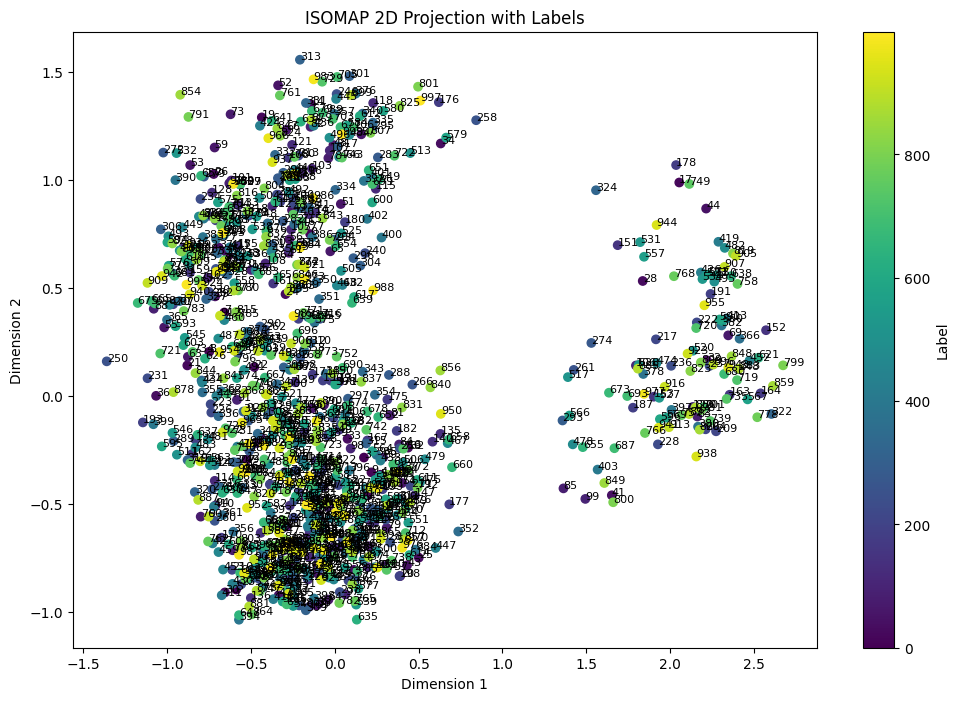

In [68]:
X = df.drop(columns=['label','sentence'])
y = df['label']

# Aplicar ISOMAP para reduzir a dimensionalidade para 2 dimensões
isomap = Isomap(n_neighbors=10,n_components=2)
X_isomap = isomap.fit_transform(X)

# Criar um DataFrame com os componentes resultantes
isomap_df = pd.DataFrame(X_isomap, columns=['Dim1', 'Dim2'])
isomap_df['label'] = y.values

# Plotar os resultados com rótulos
plt.figure(figsize=(12, 8))
scatter = plt.scatter(isomap_df['Dim1'], isomap_df['Dim2'], c=isomap_df['label'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ISOMAP 2D Projection with Labels')
plt.colorbar(scatter, label='Label')

# Anotar os pontos com os rótulos
for i in range(len(isomap_df)):
    plt.text(isomap_df['Dim1'][i], isomap_df['Dim2'][i], str(isomap_df['label'][i]), fontsize=8)

plt.show()


In [70]:
isomap_df

,Dim1,Dim2,label
0,-0.146787,0.748424,0
1,-0.061439,-0.739758,1
2,-0.341294,-0.788990,2
3,0.173990,-0.286207,3
4,0.272287,-0.365853,4
...,...,...,...
995,-0.884635,0.514110,995
996,-0.529790,-0.353778,996
997,0.509838,1.366301,997
998,-0.020552,-0.652976,998


In [122]:
from sklearn.cluster import DBSCAN


clustering = DBSCAN(eps=0.2, min_samples=25).fit(isomap_df.drop('label',axis=1))

In [123]:
isomap_df['cluster'] = clustering.labels_

In [124]:
isomap_df['cluster'].value_counts()

cluster
 0    613
-1    179
 1    136
 2     72
Name: count, dtype: int64

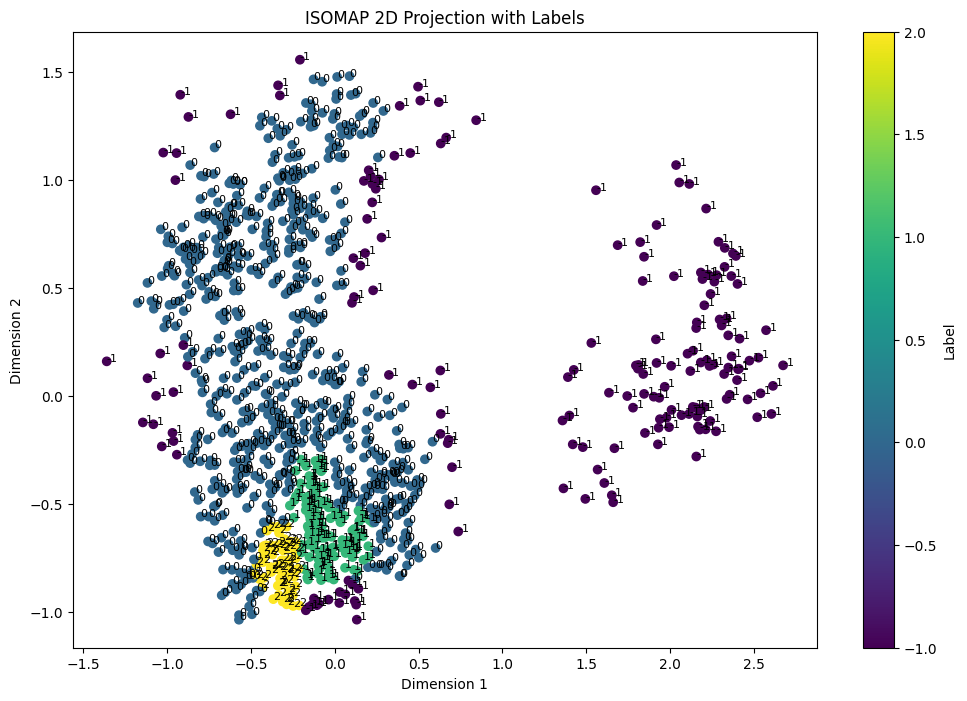

In [125]:

# Plotar os resultados com rótulos
plt.figure(figsize=(12, 8))
scatter = plt.scatter(isomap_df['Dim1'], isomap_df['Dim2'], c=isomap_df['cluster'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ISOMAP 2D Projection with Labels')
plt.colorbar(scatter, label='Label')

# Anotar os pontos com os rótulos
for i in range(len(isomap_df)):
    plt.text(isomap_df['Dim1'][i], isomap_df['Dim2'][i], str(isomap_df['cluster'][i]), fontsize=8)

plt.show()


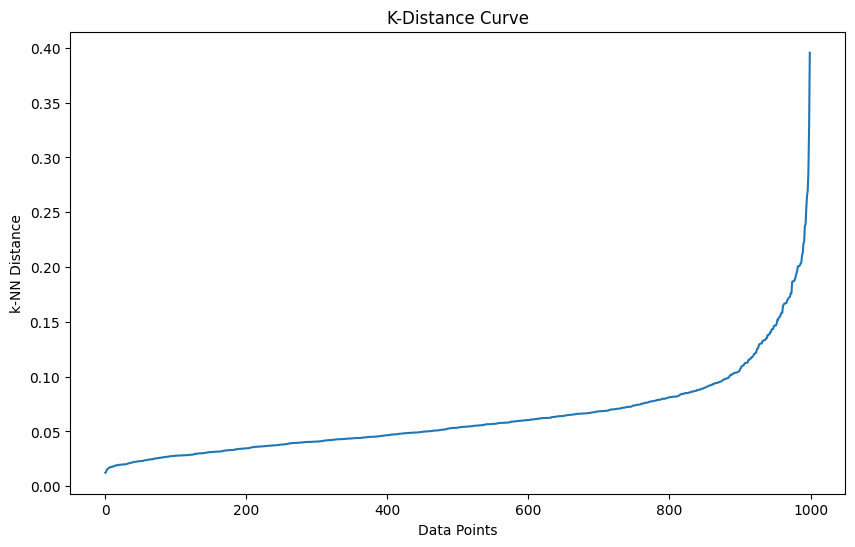

In [111]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Supondo que X seja seu dataset
X = isomap_df.drop(columns=['label','cluster'])

# Definir o número de vizinhos
k = 4  # geralmente, k é escolhido como min_samples - 1

# Calcular as distâncias dos k vizinhos mais próximos
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# Ordenar as distâncias
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

# Plotar a curva K-Distance
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('k-NN Distance')
plt.title('K-Distance Curve')
plt.show()


In [126]:
import numpy as np
data = np.arange(100).reshape(10, 10)
rows = np.array([0, 2, 3])[:, np.newaxis]
columns = np.array([1, 2])
data[rows, columns]

array([[ 1,  2],
       [21, 22],
       [31, 32]])

In [128]:
from sklearn.cluster import SpectralBiclustering

model = SpectralBiclustering(n_clusters=3, method="log", random_state=0)
model.fit(isomap_df.drop('label',axis=1))

SpectralBiclustering(method='log', random_state=0)

In [130]:
isomap_df['bicluster'] = model.row_labels_

In [150]:
data = df.drop(['label','sentence','DBSCAN_Labels','Bicluster_Labels'],axis=1).copy()

In [151]:
model = SpectralBiclustering(n_clusters=3, method="log", random_state=0)
model.fit(data)

SpectralBiclustering(method='log', random_state=0)

In [156]:
bicluster_labels = np.zeros_like(model.row_labels_)
for i in range(model.row_labels_.max() + 1):
    bicluster_labels[model.row_labels_ == i] = i

In [193]:
data['Bicluster_Labels'] = bicluster_labels

# Aplicar ISOMAP para reduzir a dimensionalidade para 2 dimensões
isomap = Isomap(n_neighbors=10,n_components=2)
X_isomap = isomap.fit_transform(data.drop('Bicluster_Labels',axis=1))

# Criar um DataFrame com os componentes resultantes
isomap_df = pd.DataFrame(X_isomap, columns=['Dim1', 'Dim2'])
isomap_df['label'] = bicluster_labels

In [172]:
df

,0,1,2,3,4,5,6,7,8,9,...,1018,1019,1020,1021,1022,1023,label,sentence,DBSCAN_Labels,Bicluster_Labels
0,-0.016815,0.022537,-0.053009,0.002195,-0.034973,0.011002,0.002369,0.027466,0.011246,-0.002594,...,0.001372,0.008621,-0.000510,0.007881,-0.051819,0.016678,0,she might take bread,0,0
1,-0.018036,0.014198,-0.045898,0.010109,-0.025681,0.005367,0.031525,-0.031677,0.050293,0.012962,...,-0.022552,0.036774,-0.001472,-0.001598,-0.063477,0.029099,1,i shall find book,0,1
2,-0.020569,0.011780,-0.043060,0.042480,-0.029480,0.015282,0.007874,0.025711,0.016800,-0.014099,...,0.005329,0.054535,0.006355,-0.028290,-0.033325,0.025940,2,i can find movie,-1,1
3,-0.035583,0.034668,-0.052551,0.010155,-0.009064,-0.019470,-0.001585,0.010010,0.052124,0.003553,...,-0.034180,-0.005878,0.016418,-0.047089,-0.076965,-0.001672,3,i might take newspaper,0,1
4,-0.004494,0.042816,-0.036072,0.025162,-0.004147,-0.010086,-0.007790,0.032440,0.012238,0.037445,...,-0.001689,-0.005932,0.028641,0.031921,-0.030380,0.015839,4,she might see song,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.002794,0.061768,-0.026779,0.007660,-0.008652,-0.050201,-0.018448,0.012360,0.045624,0.039581,...,0.022385,0.010429,0.009705,-0.010880,-0.018127,0.003508,995,we shall make water,0,0
996,-0.003670,0.033752,-0.022614,-0.027298,-0.023712,-0.032135,0.000487,-0.030045,0.037201,-0.009399,...,-0.035492,-0.015717,-0.025467,-0.024979,-0.056885,0.027710,996,i can drink book,0,0
997,-0.010529,0.032257,-0.020432,-0.000198,-0.023346,-0.020828,-0.006905,0.040497,0.022781,0.025284,...,0.028046,-0.003395,0.009216,-0.004074,-0.029037,0.018188,997,we might see bread,0,0
998,-0.004631,-0.009827,-0.022614,0.000730,-0.022705,-0.009773,0.014214,0.037201,0.059967,0.006596,...,0.009476,-0.038605,0.038086,0.020187,-0.023193,-0.008080,998,they can see car,1,1


In [209]:
isomap_df

,Dim1,Dim2,label
0,-0.146787,0.748424,0
1,-0.061439,-0.739758,1
2,-0.341294,-0.788990,1
3,0.173990,-0.286207,1
4,0.272287,-0.365853,1
...,...,...,...
995,-0.884635,0.514110,0
996,-0.529790,-0.353778,0
997,0.509838,1.366301,0
998,-0.020552,-0.652976,1


In [210]:
isomap_df.rename(columns={'label':'Bicluster_Labels'},inplace=True)
isomap_df['sentence'] = df['sentence']

In [211]:
isomap_df.query("Dim1> 1")

,Dim1,Dim2,Bicluster_Labels,sentence
17,2.054077,0.987216,2,they will take apple
28,1.836210,0.531228,2,they want to see apple
32,2.218121,0.163973,2,i can find apple
41,1.651841,-0.460893,2,she want to eat apple
44,2.214317,0.866461,2,they will write apple
...,...,...,...,...
941,1.930943,-0.148157,2,he will read apple
943,2.346829,0.130218,2,we must take apple
944,1.918955,0.790251,2,they will make apple
955,2.203591,0.418685,2,they want to make apple


In [212]:
isomap_df.query("Dim1< 1").query("Bicluster_Labels == 2")

,Dim1,Dim2,Bicluster_Labels,sentence
13,-0.373873,-0.425736,2,they must eat movie
33,0.076216,-0.199461,2,she must eat newspaper
34,0.631750,1.167762,2,she will see bread
63,-0.876025,0.180266,2,he want to eat house
71,-0.286491,-0.605748,2,we will eat book
...,...,...,...,...
939,-0.240384,1.026415,2,i must find bread
948,0.019120,-0.498560,2,they will eat book
953,-0.278358,-0.693525,2,he will eat book
964,0.372892,-0.353952,2,she shall eat book


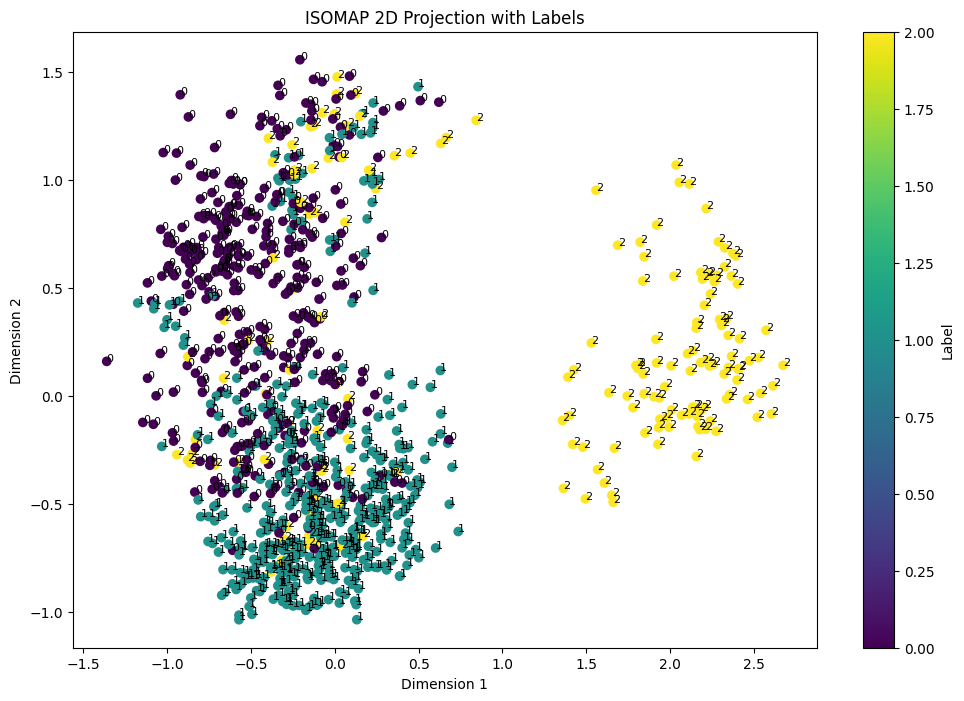

In [161]:
# Plotar os resultados com rótulos
plt.figure(figsize=(12, 8))
scatter = plt.scatter(isomap_df['Dim1'], isomap_df['Dim2'], c=isomap_df['label'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ISOMAP 2D Projection with Labels')
plt.colorbar(scatter, label='Label')

# Anotar os pontos com os rótulos
for i in range(len(isomap_df)):
    plt.text(isomap_df['Dim1'][i], isomap_df['Dim2'][i], str(isomap_df['label'][i]), fontsize=8)

plt.show()


In [181]:
new_sentece = "i went to the bathroom and eat a banana"
new_embedding = model.encode(new_sentece)['dense_vecs']

In [194]:
isomap.transform(data.head(1).drop('Bicluster_Labels',axis=1))

array([[-0.1467869 ,  0.74842449]])

In [197]:
data.head(1).drop('Bicluster_Labels',axis=1).values

array([[-0.01682,  0.02254, -0.053  , ...,  0.00788, -0.05182,  0.01668]],
      dtype=float16)

In [203]:
new_vector = isomap.transform(new_embedding.reshape(1, -1))

In [206]:
new_vector[0][0]

0.7373049712169943

In [226]:
agg_values = isomap_df.groupby('Bicluster_Labels').agg({"Dim1":'mean','Dim2':'mean'}).reset_index()

# Inicializar o dicionário
bicluster_dict = {}

for label in agg_values['Bicluster_Labels'].unique():
    bicluster_dict[label] = list(zip(agg_values[agg_values['Bicluster_Labels'] == label]['Dim1'], agg_values[agg_values['Bicluster_Labels'] == label]['Dim2']))

In [229]:
bicluster_dict[0][0]

(-0.4366949576361768, 0.42287966509539654)

In [233]:
isomap_df

,Dim1,Dim2,Bicluster_Labels,sentence
0,-0.146787,0.748424,0,she might take bread
1,-0.061439,-0.739758,1,i shall find book
2,-0.341294,-0.788990,1,i can find movie
3,0.173990,-0.286207,1,i might take newspaper
4,0.272287,-0.365853,1,she might see song
...,...,...,...,...
995,-0.884635,0.514110,0,we shall make water
996,-0.529790,-0.353778,0,i can drink book
997,0.509838,1.366301,0,we might see bread
998,-0.020552,-0.652976,1,they can see car


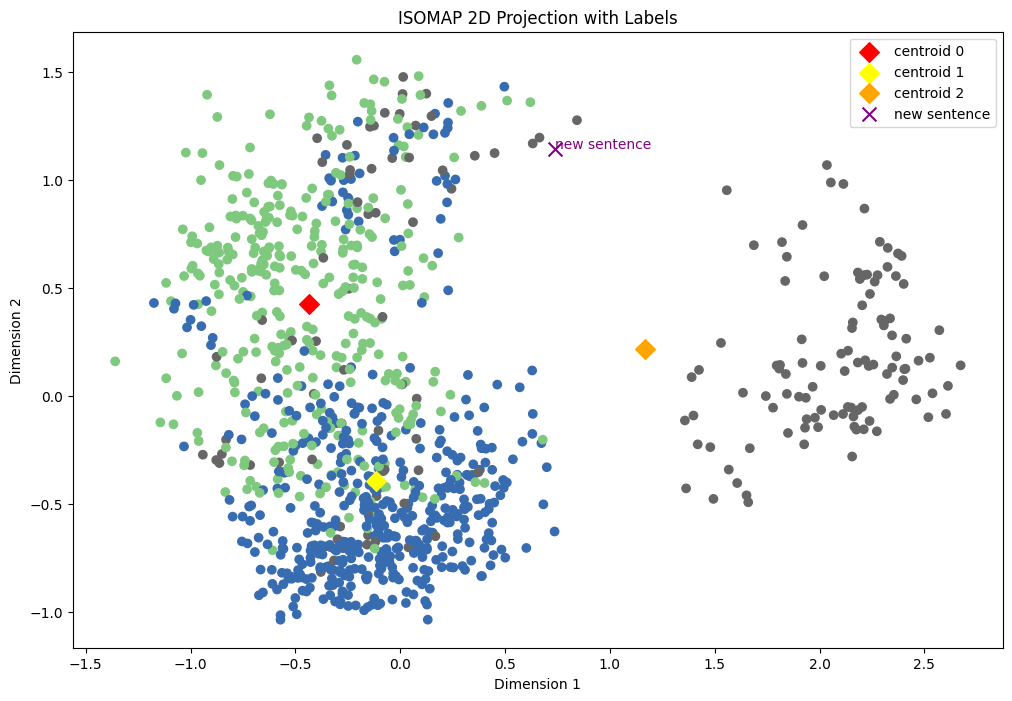

In [270]:
# Plotar os resultados com rótulos
plt.figure(figsize=(12, 8))
scatter = plt.scatter(isomap_df['Dim1'], isomap_df['Dim2'], c=isomap_df['Bicluster_Labels'], cmap='Accent')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ISOMAP 2D Projection with Labels')
#plt.colorbar(scatter, label='Label')

# Anotar os pontos com os rótulos
#for i in range(len(isomap_df)):
#    plt.text(isomap_df['Dim1'][i], isomap_df['Dim2'][i], str(isomap_df['Bicluster_Labels'][i]), fontsize=8)

## Centroides
# Adicionar o novo ponto ao gráfico
plt.scatter(bicluster_dict[0][0][0], bicluster_dict[0][0][1], color='red', marker='D', s=100 ,label='centroid 0') 
plt.scatter(bicluster_dict[1][0][0], bicluster_dict[1][0][1], color='yellow', marker='D', s=100, label='centroid 1')
plt.scatter(bicluster_dict[2][0][0], bicluster_dict[2][0][1], color='orange', marker='D', s=100, label='centroid 2')



# Adicionar o novo ponto ao gráfico
plt.scatter(new_vector[0][0], new_vector[0][1], color='purple', marker='x', s=100, label='new sentence')
plt.text(new_vector[0][0], new_vector[0][1], 'new sentence', fontsize=10, color='purple')

# Adicionar a legenda
plt.legend()

plt.show()


In [246]:
for i in [0,1,2]:
    # Escolher o grupo para calcular a distância (por exemplo, grupo 1)
    label_to_query = i
    centroid = agg_values[agg_values.Bicluster_Labels==i].drop('Bicluster_Labels',axis=1).values

    # Calcular a distância euclidiana
    distance = np.linalg.norm(new_vector - centroid)
    print(i,distance)

0 1.3777422245275888
1 1.7604444989557488
2 1.0233516141884191
